In [1]:
import matplotlib.pyplot as plt
import math as math
import random as random
import pylab as pylab
import numpy as np
import seaborn as sns
sns.set()

### Global parameters

Then we set some global variables:

In [2]:
Kb = 1.0
JJ = 1.0
mu = 1.0

### Cold Start and Hot Start

Before begining simulation, if we select all spin up or all spin down then it is called cold configuration.

In [3]:
def cold_start(L):
    U = [[[1.0 for k in range(L)]for l in range(L)] for r in range(L)]
    return U   

We can make a plot of this cold configuration by the help of Uplotter :

In [4]:
CU = cold_start(3)

In [5]:
cold_start(3)

[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]],
 [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]],
 [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]]

 if we select spin randomly up or down then it is called cold configuration

In [6]:
def hot_start(L): 
    U = [[[0.0 for i in range(L)]for j in range(L)]for r in range(L)]
    for i in range(L):
          for j in range(L):
                for r in range(L):
                    t = random.sample([-1,1],1)
                    U[i][j][r] = t[0]  
    return U 

Similarly we can plot thishot configuration as well.

In [7]:
HU = hot_start(3)
HU

[[[1, 1, 1], [1, 1, 1], [1, 1, -1]],
 [[1, 1, -1], [-1, 1, 1], [-1, 1, 1]],
 [[-1, -1, 1], [-1, 1, 1], [-1, 1, 1]]]

### Hamiltonian

Hamiltonian of  L by L lattice is given by

\\( H = - J \sum_{i\neq j} S_{i}S_{j} - \mu B \sum_{i} S_{i} \\)

In [8]:
def Hamiltonian(U,B):
    H = 0.0
    L = len(U)
    for i in range(L):
        for j in range(L):
            for r in range(L):
                
                ni = 0;nj =0;nr=0;
                if i == 0: ni = L
                if j == 0: nj = L
                if r == 0: nr=L
           
                H = H -  0.5*JJ*U[i][j][r]*(U[i][(j-1)+nj][r] \
                            + U[(i+1)%L][j][r] \
                            + U[i][(j+1)%L][r] \
                            + U[(i-1)+ni][j][r] \
                            + U[i][j][(r+1)%L] \
                            + U[i][j][(r-1)+nr]) \
                            - mu*B*U[i][j][r]
    return H

One can check what are hamiltonian for hot and cold start:

In [9]:
Hamiltonian(CU, B=0)

-81.0

In [10]:
Hamiltonian(HU, B=0)

-13.0

### Mangnetization

One can calculate magnetization by simply taking average over all spins:

In [11]:
def magnetization(U):
    return np.array(U).sum()/float((len(U)*len(U)*len(U)))          

In [12]:
magnetization(HU)

0.4074074074074074

In [13]:
magnetization(CU)

1.0

### Spin Flipper

In [14]:
def ld(k,L):
    if k == 0:
        return L
    else: return 0

In [15]:
def spin_flipper(U,B):
        L = len(U)
        
        i = random.randint(0, L-1) 
        j = random.randint(0, L-1)
        r = random.randint(0, L-1)
       
        
            
        U[i][j][r] = -U[i][j][r]
       
           
        dH =  -2.0*JJ*U[i][j][r]*(U[i][(j-1)+ld(j,L)][r] \
                            + U[(i+1)%L][j][r] \
                            + U[i][(j+1)%L][r] \
                            + U[(i-1)+ld(i,L)][j][r] \
                            + U[i][j][(r+1)%L] \
                            + U[i][j][(r-1)+ld(r,L)]) \
                            - 2.0*mu*B*U[i][j][r]   
        
        return U,dH,i,j,r

### Thermalization

In [16]:
 
 
 
def Thermalization(U,T,nrun,B) :
    M = [0.0 for k in range(nrun)]
    irun = 0       
    
    HH = [0.0 for k in range(nrun)]
       
    while irun < nrun:
        V = U
        w = magnetization(U)
        h = Hamiltonian(U,B)
                    
        U,dH,p,q,l = spin_flipper(U,B)
                   
        if dH < 0:
            M[irun] = magnetization(U)
            HH[irun] = Hamiltonian(U,B)
        else:
            frac = math.exp(-dH/(Kb*T))
            b = random.uniform(0.0,1.0)
                            
            if  b < frac:
                M[irun] = magnetization(U)
                HH[irun] = Hamiltonian(U,B)
            else:
                U[p][q][l] = -U[p][q][l]
                M[irun] = w 
                HH[irun] = h
        irun = irun +1
    return M,U,HH

In [17]:
nrun = 5
T = 1.0
L = 10
U = hot_start(L)  
M,U,HH = Thermalization(U,T,nrun, 1)
HH, M

([36.0, 30.0, 32.0, 32.0, 30.0], [0.024, 0.022, 0.024, 0.024, 0.026])

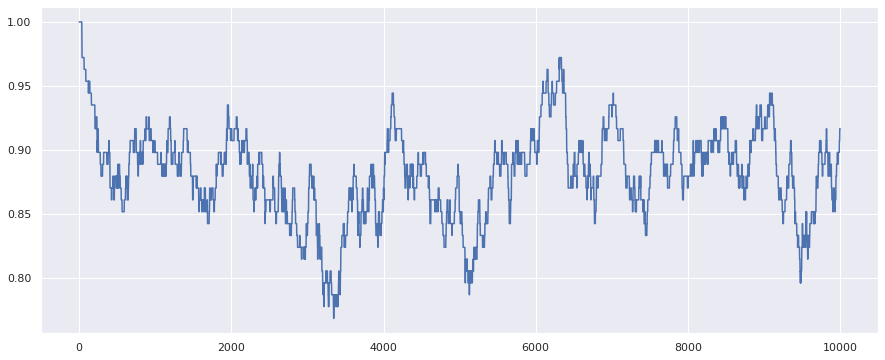

In [39]:
L = 6 #6x6x6 lattice 
nrun = 10000
T = 7
U = cold_start(L) 
M,U,HH = Thermalization(U,T,nrun, 5) #B=5
X = np.arange(0,len(M),1)
plt.figure(figsize = [15,6])
plt.plot(X,M,"-")
plt.show() 

We can plot both run with hot and cold start together:

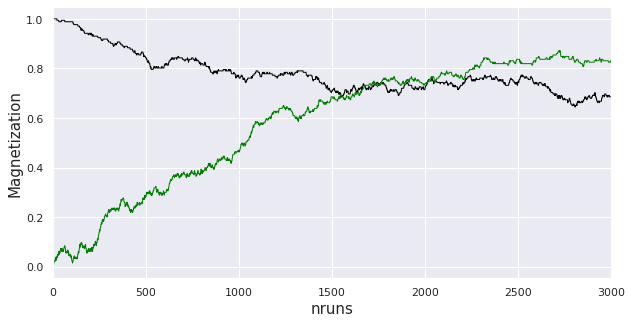

In [40]:
L =7  #7x7x7 lattice
nrun = 5000
T = 5.0      #T=5
U1 = cold_start(L) 
U2 = hot_start(L)
M1,U1,HH = Thermalization(U1,T,nrun,1)
M2,U2,HH = Thermalization(U2,T,nrun,1)   #B=1
X = np.arange(0,len(M1),1)
fig=plt.figure(figsize = [10,5])
fig.patch.set_visible(False)
plt.plot(X,M1,label="coldstart",lw=1,color="black")
plt.plot(X,M2,label="hotstart",lw=1,color="green")
plt.xlim(0,3000)
plt.xlabel("nruns",fontsize=15)
plt.ylabel("Magnetization",fontsize=15)
plt.style.use('classic')
plt.show()

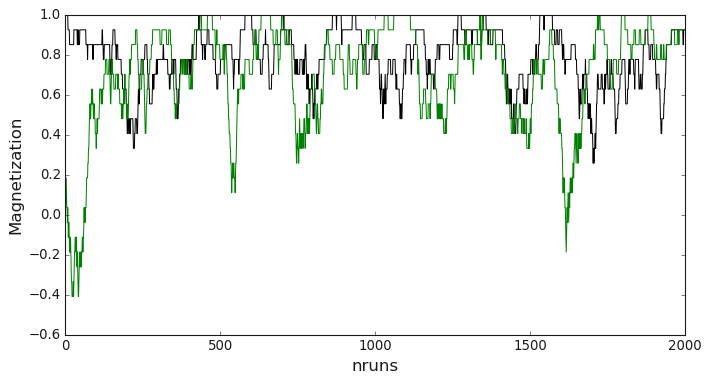

In [53]:
L =3   #our simulation is of 3x3x3 lattice
nrun = 5000
T = 5.0
U1 = cold_start(L) 
U2 = hot_start(L)
M1,U1,HH = Thermalization(U1,T,nrun,1)
M2,U2,HH = Thermalization(U2,T,nrun,1)
X = np.arange(0,len(M1),1)
fig=plt.figure(figsize = [10,5])
fig.patch.set_visible(False)
plt.plot(X,M1,label="coldstart",lw=0.9,color="black")
plt.plot(X,M2,label="hotstart",lw=0.9,color="green")
plt.xlim(0,2000)
plt.xlabel("nruns",fontsize=15)
plt.ylabel("Magnetization",fontsize=15)
plt.style.use('classic')
plt.show()

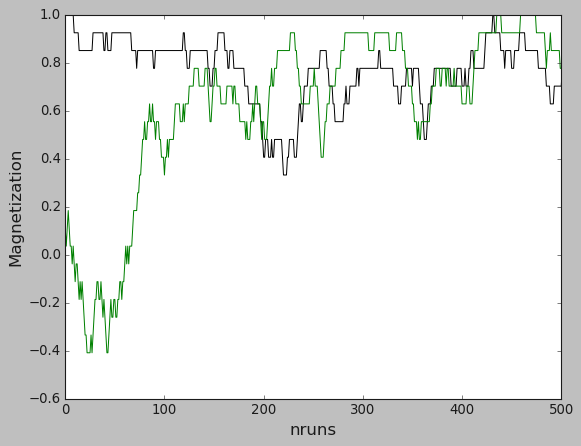

In [55]:
fig.patch.set_visible(False)
plt.plot(X,M1,label="coldstart",lw=0.9,color="black")
plt.plot(X,M2,label="hotstart",lw=0.9,color="green")
plt.xlim(0,500)
plt.xlabel("nruns",fontsize=15)
plt.ylabel("Magnetization",fontsize=15)
plt.style.use('classic')
plt.show()

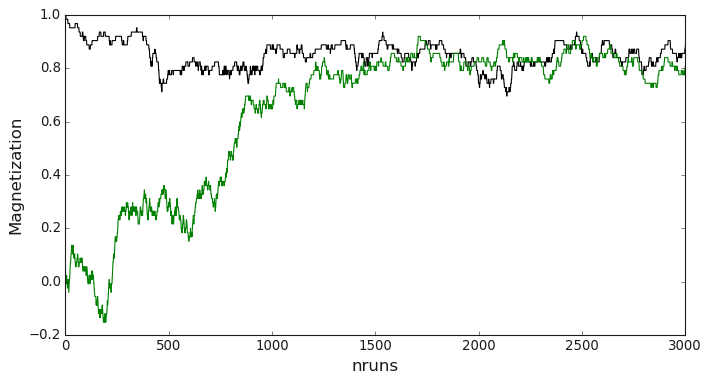

In [26]:
L =5
nrun = 5000
T = 5.0
U1 = cold_start(L) 
U2 = hot_start(L)
M1,U1,HH = Thermalization(U1,T,nrun,1)
M2,U2,HH = Thermalization(U2,T,nrun,1)
X = np.arange(0,len(M1),1)
fig=plt.figure(figsize = [10,5])
fig.patch.set_visible(False)
plt.plot(X,M1,label="coldstart",lw=1,color="black")
plt.plot(X,M2,label="hotstart",lw=1,color="green")
plt.xlim(0,3000)
plt.xlabel("nruns",fontsize=15)
plt.ylabel("Magnetization",fontsize=15)
plt.style.use('classic')
plt.show()

In [29]:
L = 3
nrun = 10000
Tn = 125
avm = []
stdh = []
KT = []

for t in range(1,Tn+1):
        T = 0.2*t
        KT.append(T)
        U = hot_start(L)
        M,U,HH = Thermalization(U,T,nrun,0)
        nM = M[2000:nrun-1]
        nH = HH[2000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))

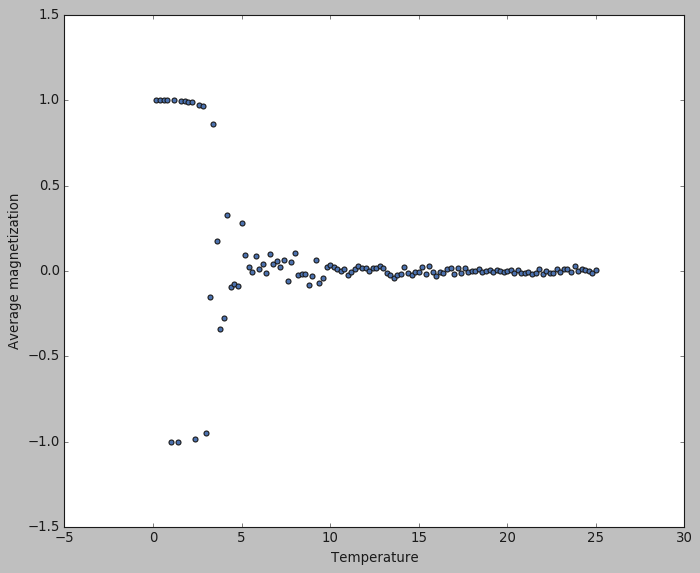

In [30]:
plt.figure(figsize = [10,8])
plt.scatter(KT,avm)
plt.xlabel("Temperature")
plt.ylabel("Average magnetization")
plt.style.use('classic')
plt.show() 

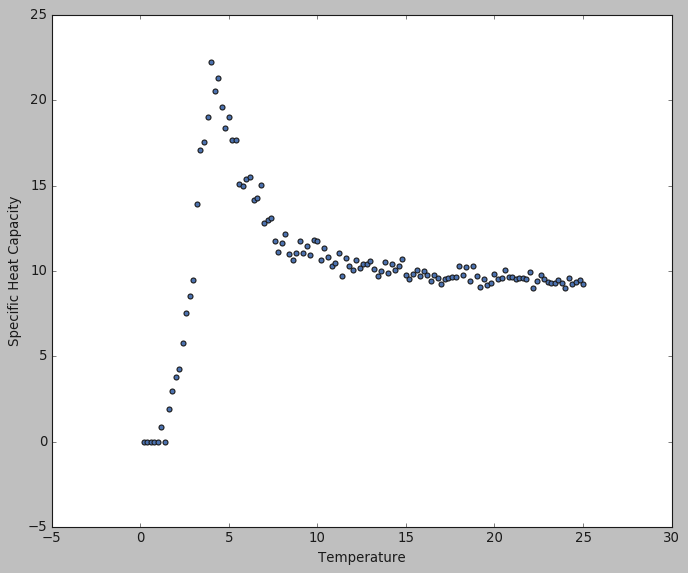

In [31]:
plt.figure(figsize = [10,8])
plt.scatter(KT,stdh)
plt.xlabel("Temperature")
plt.ylabel("Specific Heat Capacity")
plt.show() 

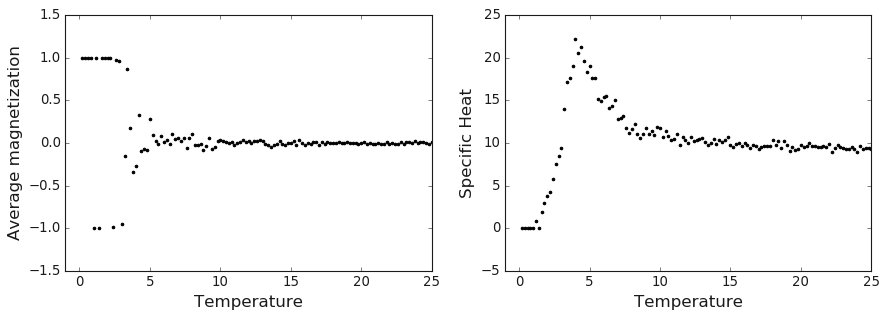

In [32]:
 
 
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
fig.patch.set_visible(False)
 
 
 
axes[0].scatter(KT,avm,s=5,color="black")
axes[0].set_ylabel("Average magnetization",fontsize='15')
#axes[0].set_ylim([-5, 5])
axes[0].set_xlim([-1, 25])
axes[0].set_xlabel("Temperature",fontsize='15')

axes[1].scatter(KT, stdh,s=5,color="black")
 
axes[1].set_xlabel("Temperature",fontsize='15')
axes[1].set_ylabel("Specific Heat",fontsize='15')
axes[1].set_xlim([-1, 25])
    
 
 
plt.style.use('classic')

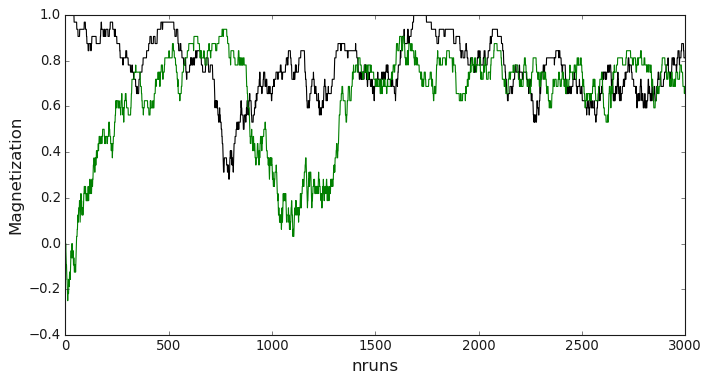

In [27]:
L =4
nrun = 5000
T = 5.0
U1 = cold_start(L) 
U2 = hot_start(L)
M1,U1,HH = Thermalization(U1,T,nrun,1)
M2,U2,HH = Thermalization(U2,T,nrun,1)
X = np.arange(0,len(M1),1)
fig=plt.figure(figsize = [10,5])
fig.patch.set_visible(False)
plt.plot(X,M1,label="coldstart",lw=1,color="black")
plt.plot(X,M2,label="hotstart",lw=1,color="green")
plt.xlim(0,3000)
plt.xlabel("nruns",fontsize=15)
plt.ylabel("Magnetization",fontsize=15)
plt.style.use('classic')
plt.show()

/home/hari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


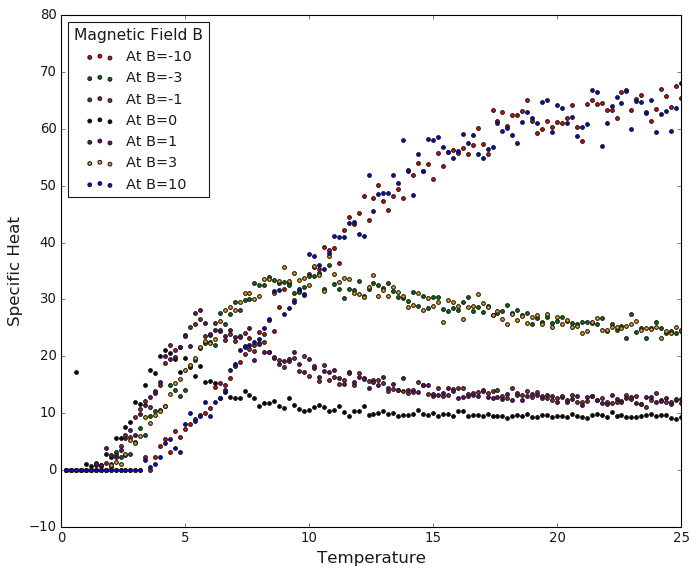

In [19]:
#Specific Heat at different field
fig=plt.figure(figsize = [10,8])
 
#plt.title('Specific Heat Vs Temperature at different field B in 1d',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [-10,-3,-1,0,1,3,10]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 125
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.2*t
        KT.append(T)
        U = hot_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        #nM = M[2000:nrun-1]
        nH = HH[2000:nrun-1]
        stdh.append(np.std(nH))
        #avm.append(np.mean(nM))
    plt.scatter(KT,stdh,s=11,c=colr,label=('At B={}'.format(B)))
    l=l+1
 
ax = plt.axes()
ax.set_facecolor("white")
 
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_xlim(0, 25)
#ax.set_ylim(0,35)
 
plt.xlabel("Temperature",fontsize='15')
plt.ylabel("Specific Heat",fontsize='15')
plt.legend(title="Magnetic Field B",title_fontsize=14,prop={"size":13},loc=2)
 
fig.patch.set_visible(False)
plt.show()

plt.style.use('classic')

/home/hari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


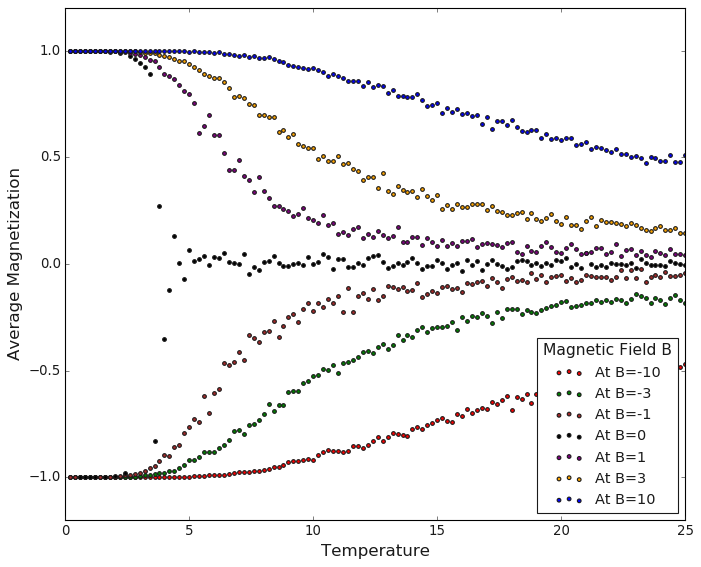

In [24]:
#Magnetization at differet field
fig=plt.figure(figsize = [10,8])
 
#plt.title('Specific Heat Vs Temperature at different field B in 1d',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [-10,-3,-1,0,1,3,10]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 125
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.2*t
        KT.append(T)
        U = hot_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[2000:nrun-1]
        #nH = HH[2000:nrun-1]
        #stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,avm,s=11,c=colr,label=('At B={}'.format(B)))
    l=l+1
 
ax = plt.axes()
ax.set_facecolor("white")
 
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_xlim(0, 25)
ax.set_ylim(-1.2,1.2)
 
plt.xlabel("Temperature",fontsize='15')
plt.ylabel("Average Magnetization",fontsize='15')
plt.legend(title="Magnetic Field B",title_fontsize=14,prop={"size":13},loc=4)
 
fig.patch.set_visible(False)
plt.show()

plt.style.use('classic')